In [1]:
import pandas as pd
import numpy as np
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
df = df.fillna(df.mean())

In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<ipython-input-8-151c2cfb4917>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MEDV'], bins =20)


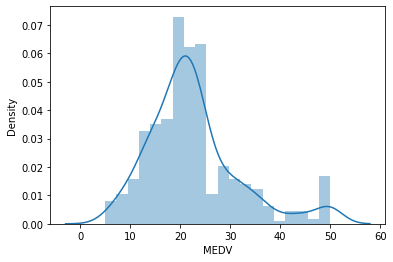

In [8]:
sns.distplot(df['MEDV'], bins =20)
plt.show()

In [9]:
corr_matrix = df.corr().round(2)

<Axes: >

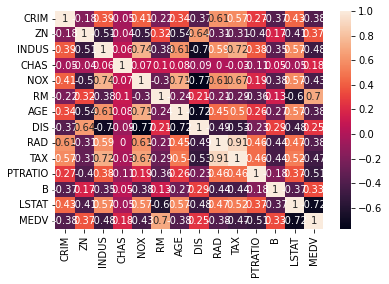

In [10]:
sns.heatmap(data=corr_matrix, annot = True)

In [11]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

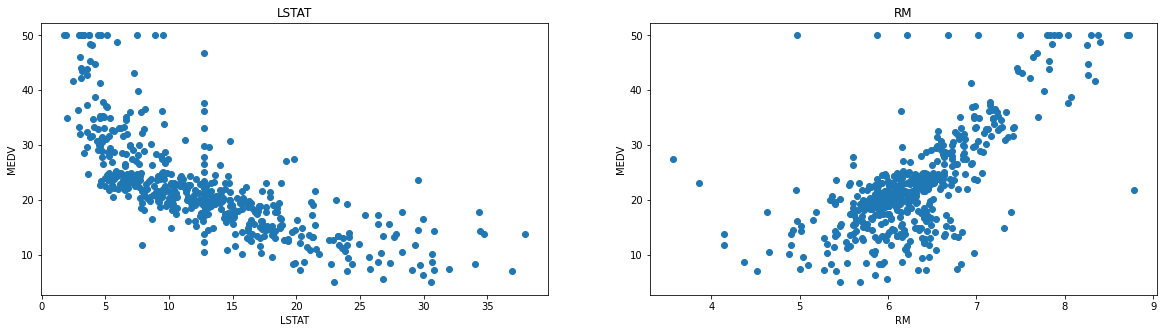

In [12]:
plt.figure(figsize=(20,5))

feat = ['LSTAT','RM']
targ = df['MEDV']

for i, col in enumerate(feat):
    plt.subplot(1, len(feat), i+1)
    x = df[col]
    y = targ
    
    plt.scatter(x,y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    

In [13]:
x = df[['LSTAT','RM','INDUS','RAD','B']]
y = df['MEDV']

In [14]:
x

,LSTAT,RM,INDUS,RAD,B
0,4.980000,6.575,2.31,1,396.90
1,9.140000,6.421,7.07,2,396.90
2,4.030000,7.185,7.07,2,392.83
3,2.940000,6.998,2.18,3,394.63
4,12.715432,7.147,2.18,3,396.90
...,...,...,...,...,...
501,12.715432,6.593,11.93,1,391.99
502,9.080000,6.120,11.93,1,396.90
503,5.640000,6.976,11.93,1,396.90
504,6.480000,6.794,11.93,1,393.45


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=100)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression()

In [18]:
reg.fit(x_train, y_train)

LinearRegression()

In [19]:
#the value of intercept
reg.intercept_

-7.735815926387151

In [20]:
#the value of coef
reg.coef_

array([-0.46791867,  5.38291971, -0.08583357, -0.03706747,  0.01055397])

In [21]:
pred = reg.predict(x_test)

In [22]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,pred)
print('mean_sqrd_error is==',mean_squared_error(y_test,pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score is ',score)

mean_sqrd_error is== 31.943719862402624
root_mean_squared error of is== 5.651877551964712
r2_score is  0.6693002597482869


In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
def polymodel(degree):
    poly_feat = PolynomialFeatures(degree=degree)
    x_train_poly = poly_feat.fit_transform(x_train)
    x_test_poly = poly_feat.fit_transform(x_test)
    
    poly_model = LinearRegression()
    poly_model.fit(x_train_poly, y_train)
    
    y_train_pred_poly  =poly_model.predict(x_train_poly)
    y_test_pred_poly  =poly_model.predict(x_test_poly)
    
    rmse_train  = (np.sqrt(mean_squared_error(y_train,y_train_pred_poly)))
    rmse_test = rmse = (np.sqrt(mean_squared_error(y_test,y_test_pred_poly)))
    
    r2_train = r2_score(y_train,y_train_pred_poly)
    r2_test = r2_score(y_test,y_test_pred_poly)
    
    print('rmse_train',rmse_train)
    print('rmse_test',rmse_test)
    
    print('r2_train',r2_train)
    print('r2_test',r2_test)

In [25]:
polymodel(2)

rmse_train 3.8876042353047797
rmse_test 3.897156106530188
r2_train 0.8141187495442711
r2_test 0.842766902483936


In [26]:
polymodel(3)

rmse_train 3.2305706609737475
rmse_test 4.516872822702067
r2_train 0.87163991929906
r2_test 0.7887853243284606
